# Distributions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
from itertools import product

## Binomial Distribution


Text(0.5, 0, 'y')

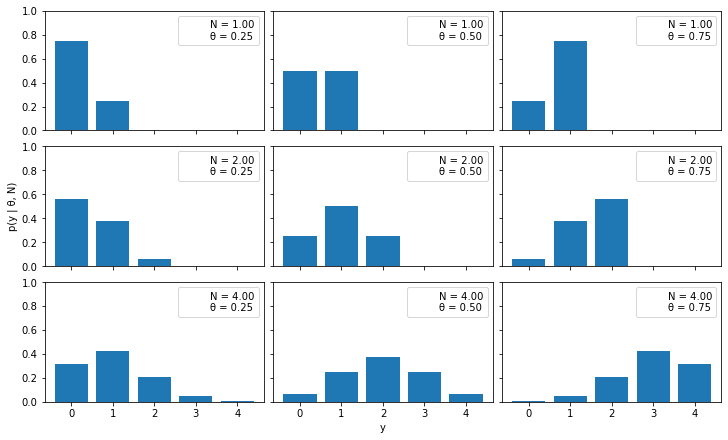

In [3]:
ns = [1, 2, 4]  # Number of trials
ps = [0.25, 0.5, 0.75]  # Probability of success

prods = product(ns, ps)

x = np.arange(0, max(ns) + 1)

_, axes = plt.subplots(len(ns),
                       len(ps),
                       sharex=True,
                       sharey=True,
                       figsize=(10, 6),
                       constrained_layout=True)

for ax, prod in zip(axes.flatten(), prods):

    n, p = prod
    y = stats.binom(n, p).pmf(x)

    ax.bar(x, y, color='C0')
    ax.plot(0, 0, label=f"N = {n:3.2f}\nθ = {p:3.2f}", alpha=0)
    ax.set_ylim(0, 1)
    ax.legend()

axes[0, 0].set_xticks(x)
axes[1, 0].set_ylabel('p(y | θ, N)')
axes[2, 1].set_xlabel('y')

## Beta Distribution


Text(-0.05, 0.5, 'p(θ)')

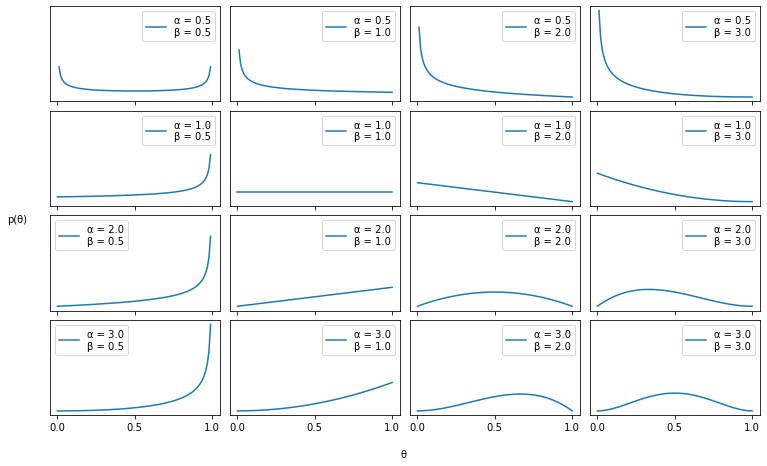

In [4]:
αs = [0.5, 1, 2, 3]
βs = [0.5, 1, 2, 3]

prods = product(αs, βs)

x = np.linspace(0, 1, 100)

f, axes = plt.subplots(len(αs),
                       len(βs),
                       sharex=True,
                       sharey=True,
                       figsize=(10, 6),
                       constrained_layout=True)

for ax, prod in zip(axes.flatten(), prods):

    α, β = prod
    y = stats.beta(α, β).pdf(x)
    ax.plot(x, y, label=f"α = {α:2.1f}\nβ = {β:2.1f}")
    ax.legend()

axes[1, 0].set_yticks([])
axes[1, 0].set_xticks([0, 0.5, 1])
f.text(0.5, -.05, 'θ', ha='center')
f.text(-.05, 0.5, 'p(θ)', va='center', rotation=0)

## Postriori


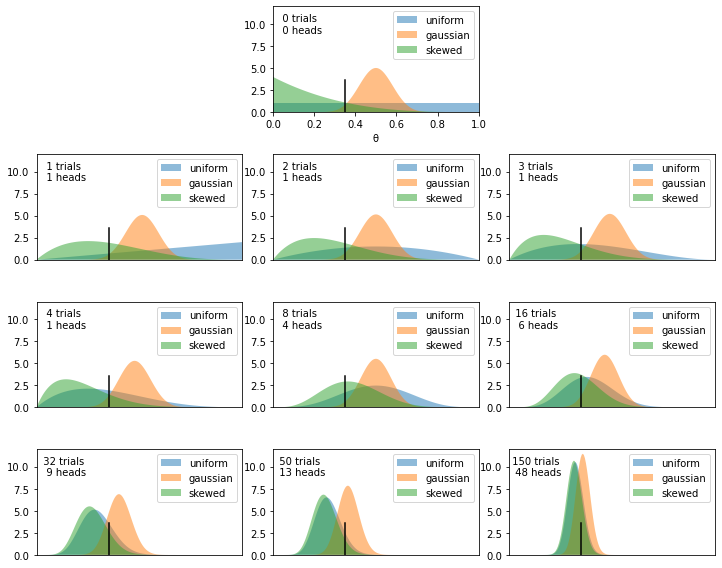

In [5]:
plt.figure(figsize=(10, 8))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
heads = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
θ_real = 0.35

beta_params = [(1, 1), (20, 20), (1, 4)]
labels = ('uniform', 'gaussian', 'skewed')

x = np.linspace(0, 1, 200)

for idx, N in enumerate(n_trials):
    if idx == 0:
        ax = plt.subplot(4, 3, 2)
        ax.set_xlabel('θ')
    else:
        ax = plt.subplot(4, 3, idx + 3)
        ax.set_xticks([])

    y = heads[idx]

    for (α_prior, β_prior), label in zip(beta_params, labels):
        p_θ_given_y = stats.beta.pdf(x, α_prior + y, β_prior + N - y)
        ax.fill_between(x=x, y1=0, y2=p_θ_given_y, label=label, alpha=0.5)

    ax.axvline(θ_real, ymax=0.3, color='k')
    ax.text(0, 9, s=f'{N:4d} trials\n{y:4d} heads')
    ax.axis([0, 1, 0, 12])
    ax.legend()
plt.tight_layout()
# plt.savefig('images/ch1/dist_beta_posteri.png')
plt.show()

# Binomial distribution

The Binomial distribution [`binom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom) provides the following three functions: `pmf`, `cdf`, and `rvs`. Unlike R, SciPy provides an implementation of the Bernoulli distribution in [`scipy.stats.bernoulli`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete_bernoulli.html). But as an alterative for `bernoulli`, we can just use the Binomial functions with $k \in \{0,1\}$ and $n = 1$.

In [6]:
from scipy.stats import binom

# to learn more about scipy.stats.binom, un-comment ouf the following line
#print(binom.__doc__)

* `binom.pmf` is `scipy.stats`' implementation of the Binomial PMF. It takes three inputs: the first is the value of `k` at which to evaluate the PMF, and the second and third are the parameters `n` and `p`. For example, `binom.pmf(3, 5, 0.2)` returns the probability $P(X = 3)$ where $X \sim Bin(5, 0.2)$. In other words,
 
 
\begin{align}
  binom.pmf(3, 5, 0.2) &= \binom{5}{3} (0.2)^{3} (0.8)^{2} \\
  &= 0.0512 
\end{align}

In [7]:
k = 3
n = 5
p = 0.2

binom.pmf(k, n, p)

0.05120000000000003

* `binom.cdf` is the Binomial CDF. It takes three inputs: the first is the value of `k` at which to evaluate the CDF, and the second and third are the parameters. $binom.cdf(3, 5, 0.2)$ is the probability $P(X \leq 3)$ where $X \sim Bin(5, 0.2)$. So

\begin{align}
  binom.cdf(3, 5, 0.2) &= \sum_{k=0}^{3} \binom{5}{k} (0.2)^k (0.8)^{5-k} \\
  &= 0.9933
\end{align}

In [8]:
k = 3
n = 5
p = 0.2

binom.cdf(k, n, p)

0.99328

* `binom.rvs` is a function for generating Binomial random variables. For `rvs`, the first and second inputs are still the parameters `n` and `p`, and the `size` parameter is how many r.v.s we want to generate. Thus the command `binom.rvs(5, 0.2, size=7)` produces realizations of seven i.i.d. $Bin(5, 0.2)$ r.v.s. When we ran this command, we got

In [9]:
# seed the random number generator
np.random.seed(144)

n = 5
p = 0.2

binom.rvs(n, p, size=7)

array([0, 2, 1, 0, 1, 1, 1])

Unless you change the `numpy.random.seed` parameter value in code cell [1] above, you'll get the same values above the first time this notebook is run.

We can also evaluate PMFs and CDFs at an entire vector of values. For example, recall that `numpy.arange(0,n+1)` is a quick way to list the integers from $0$ to $n$. The command `binom.pmf(numpy.arange(0, 5+1), 5, 0.2)` returns 6 numbers, $P(X = 0)\text{, } P(X = 1)\text{, } \cdots \text{, } P(X = 5)$, where $X \sim Bin(5, 0.2)$.

In [10]:
n = 5
p = 0.2

binom.pmf(np.arange(0, n+1), n, p)

array([3.2768e-01, 4.0960e-01, 2.0480e-01, 5.1200e-02, 6.4000e-03,
       3.2000e-04])

# Hypergeometric distribution 

The Hypergeometric distribution is implemented in [`scipy.stats.hypergeom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html#scipy.stats.hypergeom), which similarly provides the following three functions: `pmf`, `cdf`, and `rvs`.  As one might expect, `pmf` is the Hypergeometric PMF, `cdf` is the Hypergeometric CDF, and `rvs` generates Hypergeometric r.v.s. Since the Hypergeometric distribution has three parameters, each of these functions takes at least three inputs. For `pmf` and `cdf`, the first input is the value at which we wish to evaluate the PMF or CDF, and the remaining three inputs are the parameters of the distribution.

In [11]:
from scipy.stats import hypergeom

# to learn more about scipy.stats.hypergeom, un-comment ouf the following line
#print(hypergeom.__doc__)

The PMF is defined as

\begin{align}
  p(k, M, n, N) &= \frac{\binom{n}{k} \, \binom{M-n}{N-k}}{\binom{M}{N}}
\end{align}

where
* $M$ = the total number of objects (black and white balls, for instance)
* $n$ = the total number of objects of Type I (say we're interested in the white balls)
* $N$ = the total number of objects drawn without replacement from $M$


Consider the case where we have a total of $M = 17$ balls (black and white), with $n = 10$ among them being white (and 7 being black), and we draw $N = 8$ of the balls without replacement.

In [12]:
n = 10       # white balls <- these are the ones we are interested in
b = 7        # black balls
M = n + b    # total number of balls
N = 8        # number of balls to draw w/out replacement

* `hypergeom.pmf(k, 17, 10, 8)` returns the probability $P(X = k)$ where $X \sim HGeom(10, 7, 8)$

In [13]:
# k = 1
hypergeom.pmf(1, M, n, N)

0.0004113533525298236

* `hypergeom.cdf(k, 17, 10, 8)` returns $P(X \leq k)$

In [14]:
# k = 2
hypergeom.cdf(2, M, n, N)

0.013368983957219274

* `hypergeom.rvs(17, 10, 8, size=s)` uses the `size` parameter to specify the number of r.v.s. we want to generate. `hypergeom.rvs(17, 10, 8, size=100)` generates 100 i.i.d. $HGeom(10, 7, 8)$ r.v.s.

In [15]:
np.random.seed(233)

hypergeom.rvs(M, n, N, size=100)

array([6, 3, 5, 5, 5, 4, 3, 4, 7, 4, 6, 4, 6, 6, 4, 4, 5, 4, 6, 5, 5, 4,
       6, 5, 5, 6, 5, 4, 4, 3, 5, 4, 5, 5, 6, 3, 5, 6, 6, 4, 5, 4, 5, 5,
       4, 3, 5, 4, 5, 5, 3, 7, 5, 4, 5, 6, 4, 3, 5, 5, 3, 4, 4, 4, 5, 4,
       4, 5, 6, 4, 4, 4, 5, 5, 5, 4, 5, 4, 4, 4, 7, 4, 5, 5, 5, 4, 5, 5,
       3, 4, 4, 5, 4, 4, 5, 4, 6, 5, 6, 4])

# Discrete distributions with finite support

We can generate r.v.s from any discrete distribution with finite support using the [`numpy.random.choice`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html#numpy.random.choice) function. When we first introduced the `numpy.random.choice` function, we said that it can be used in the form `numpy.random.choice(numpy.arange(1,n+1), k, replace=False)` or `numpy.random.choice(np.arange(1,n+1), k)` to sample $k$ times from the integers 1 through $n$, either without or with replacement. For example, to generate 5 independent $DUnif(1, 2, \ldots, 100$) r.v.s, we can use the function invocation `numpy.random.choice(numpy.arange(1,100+1), 5)`.

It turns out that `numpy.random.choice` is far more versatile. If we want to sample from the values $x_1, \ldots, x_n$ with probabilities $p_1, \ldots, p_n$, we simply create an array `x` containing all the $x_i$ and an array `p` containing all the $p_i$, then feed them into `choice`. For example, suppose we are interested in generating realizations of i.i.d. r.v.s $X_1, \ldots, X_{100}$ whose PMF is

\begin{align}
  P(X_j = 0) &= 0.25 \\
  P(X_j = 1) &= 0.5 \\
  P(X_j = 5) &= 0.1 \\
  P(X_j = 10) &= 0.15
\end{align}

and $P(X_j = x) = 0$ for all other values of $x$. First, we use the `numpy.array`  function to create arrays with the support of the distribution and the PMF probabilities.

In [16]:
x = np.array([0, 1, 5, 10])
p = np.array([0.25, 0.5, 0.1, 0.15])

Next, we use the `choice` function. Here's how to get 100 samples from the above PMF:

In [17]:
np.random.seed(377)

np.random.choice(x, 100, p=p)

array([ 0,  1,  1,  5,  0,  1,  1,  0,  1,  0,  0,  1,  1,  0,  1,  5,  1,
        0,  5,  1,  1,  1,  0,  1,  1,  0,  1,  0,  5,  1,  1,  1, 10,  0,
        5,  0, 10,  1,  1,  1,  0,  1,  1,  5,  1,  5, 10, 10,  0,  1,  1,
        1,  1, 10,  0,  1, 10,  0,  0,  1,  1,  5,  1, 10,  1,  0,  1,  1,
        5,  1,  1, 10,  1,  1,  0,  0,  0,  1,  1, 10, 10,  0,  5,  1,  1,
        5,  1,  1,  0,  0,  0,  1,  1,  1,  0,  1,  0,  1,  1,  0])

The inputs are the array `x` to sample from, the number of samples to generate (100 in this case), the probabilities `p` of sampling the values in `x` (if this is omitted, the probabilities are assumed equal), and whether to sample with replacement (the default is `replace=True`).